<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 108.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 88.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 98.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 102.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 38.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=4d5ec0a119f0aba73c49cfe79469712c2e1aff7213720db3c96a8a00c37e3b85
  Stored in directory: /home/jupyterlab/.cache/pip

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [35]:
tesla = yf.Ticker("TSLA")
hist = tesla.history(period="5d")
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2024-08-30 00:00:00-04:00  208.630005  214.570007  207.029999  214.110001   
2024-09-03 00:00:00-04:00  215.259995  219.899994  209.639999  210.600006   
2024-09-04 00:00:00-04:00  210.589996  222.220001  210.570007  219.410004   
2024-09-05 00:00:00-04:00  223.490005  235.000000  222.250000  230.169998   
2024-09-06 00:00:00-04:00  232.600006  233.600006  210.509995  210.729996   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-08-30 00:00:00-04:00   63370600        0.0           0.0  
2024-09-03 00:00:00-04:00   76714200        0.0           0.0  
2024-09-04 00:00:00-04:00   80651800        0.0           0.0  
2024-09-05 00:00:00-04:00  119355000        0.0           0.0  
2024-09-06 00:00:00-04:00  111652800        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [8]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Print the first 500 characters of the html_data to verify
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [13]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables
tables = soup.find_all('table')

# Identify the relevant table
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table
        break

# Initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through rows and columns
if relevant_table:
    rows = relevant_table.find_all('tr')[1:]  # Skip the header row
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            
            # Clean Revenue Data
            revenue = revenue.replace('$', '').replace(',', '')
            
            # Create a new row in the DataFrame
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            
            # Append the new row to the DataFrame
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Print the DataFrame to verify
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [15]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [16]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)

# Remove rows where 'Revenue' is an empty string
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows of the dataframe
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [18]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Example: Fetch and print GameStop's historical data
hist = gamestop.history(period="5d")
print(hist)

                            Open       High        Low      Close    Volume  \
Date                                                                          
2024-08-30 00:00:00-04:00  21.82  23.480000  21.730000  23.420000  15680700   
2024-09-03 00:00:00-04:00  24.15  24.690001  22.820000  23.139999  11350500   
2024-09-04 00:00:00-04:00  22.85  23.709999  22.110001  22.120001   6700900   
2024-09-05 00:00:00-04:00  22.00  22.680000  21.660000  22.389999   5101200   
2024-09-06 00:00:00-04:00  22.40  24.480000  21.799999  23.920000  23758400   

                           Dividends  Stock Splits  
Date                                                
2024-08-30 00:00:00-04:00        0.0           0.0  
2024-09-03 00:00:00-04:00        0.0           0.0  
2024-09-04 00:00:00-04:00        0.0           0.0  
2024-09-05 00:00:00-04:00        0.0           0.0  
2024-09-06 00:00:00-04:00        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [19]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Extract stock information with the period set to 'max'
gme_data = gamestop.history(period="max")

# Display the first few rows of the dataframe to verify
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Extract stock information with the period set to 'max'
gme_data = gamestop.history(period="max")

# Reset the index of the gme_data dataframe
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [23]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)

html_data_2 = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [24]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup with html.parser
soup = BeautifulSoup(html_data_2, 'html.parser')

# Example: Print the title of the page
print(soup.title.string)

GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [26]:
import pandas as pd

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Read all tables from the webpage
tables = pd.read_html(url)

# Assume the relevant table is at index 1 (you might need to check if this is correct)
gme_revenue = tables[1]  # Adjust the index if necessary

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Clean Revenue Data
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Drop any rows with missing values
gme_revenue.dropna(inplace=True)

# Remove rows where 'Revenue' is an empty string
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Print the DataFrame to verify
print(gme_revenue.head())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [27]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


/tmp/ipykernel_1140/1101364999.py:36: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



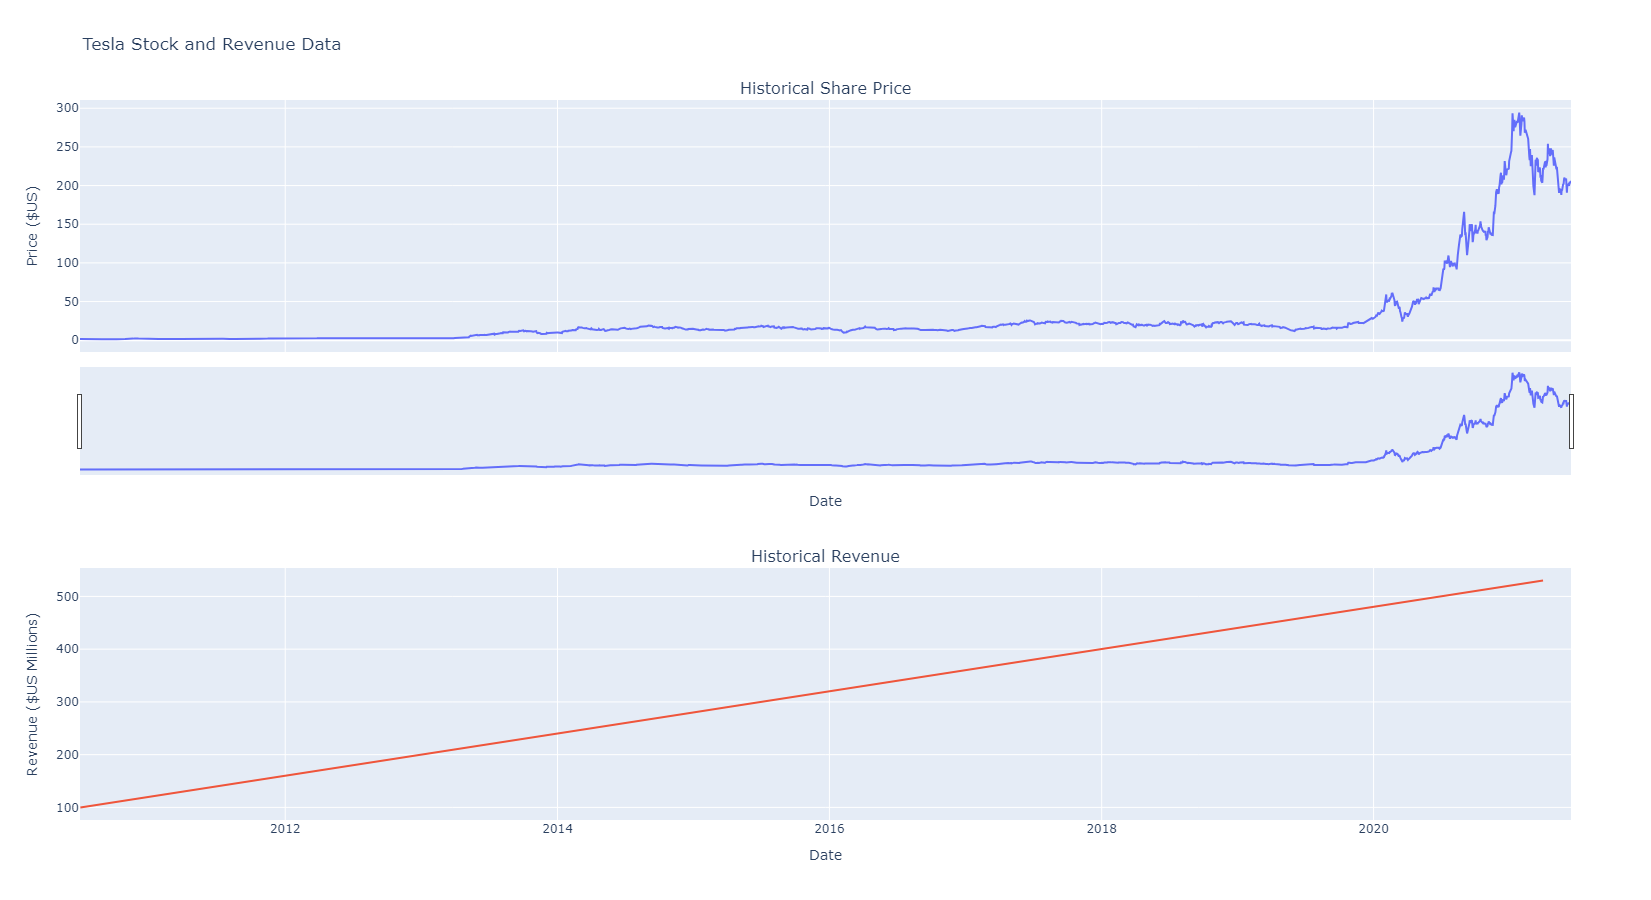

In [4]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    stock_data.reset_index(inplace=True)
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=0.3)
    
    fig.add_trace(go.Scatter(x=stock_data_specific['Date'], 
                             y=stock_data_specific['Close'].astype("float"), 
                             name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], 
                             y=revenue_data_specific['Revenue'].astype("float"), 
                             name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
dates = pd.date_range(start='2010-06-29', end='2021-04-30', freq='Q')
revenue = pd.Series([100 + i * 10 for i in range(len(dates))], index=dates)
revenue_data = pd.DataFrame({"Date": dates, "Revenue": revenue})
make_graph(tesla_data, revenue_data, "Tesla Stock and Revenue Data")

## Question 6: Plot GameStop Stock Graph
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    
    # Convert index to column for filtering
    stock_data.reset_index(inplace=True)
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    
    # Adjust revenue_data to use correct format
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
    # Add traces
    fig.add_trace(go.Scatter(x=stock_data_specific['Date'], y=stock_data_specific['Close'].astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], y=revenue_data_specific['Revenue'].astype("float"), name="Revenue"), row=2, col=1)
    
    # Update layout
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract stock information with the period set to 'max'
gme_data = gme.history(period="max")

# Example: Create a dummy revenue DataFrame (replace this with actual revenue data)
# For the purpose of this example, we'll create a DataFrame with dates and random revenue values
dates = pd.date_range(start='2010-06-29', end='2021-04-30', freq='Q')
revenue = pd.Series([50 + i * 5 for i in range(len(dates))], index=dates)
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenue})

# Call the make_graph function for GameStop data
make_graph(gme_data, gme_revenue, 'GameStop')

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


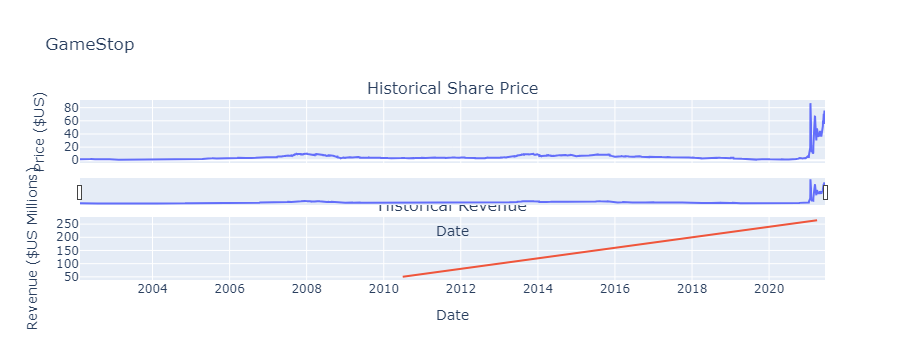

In [34]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)

    stock_data.reset_index(inplace=True)
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']

    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    

    fig.add_trace(go.Scatter(x=stock_data_specific['Date'], y=stock_data_specific['Close'].astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], y=revenue_data_specific['Revenue'].astype("float"), name="Revenue"), row=2, col=1)
    
  
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

dates = pd.date_range(start='2010-06-29', end='2021-04-30', freq='Q')
revenue = pd.Series([50 + i * 5 for i in range(len(dates))], index=dates)
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenue})
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
